# Simple Linear Regression

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [5]:
# http://faculty.marshall.usc.edu/gareth-james/ISL/data.html
df = pd.read_csv("./dataSets/Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


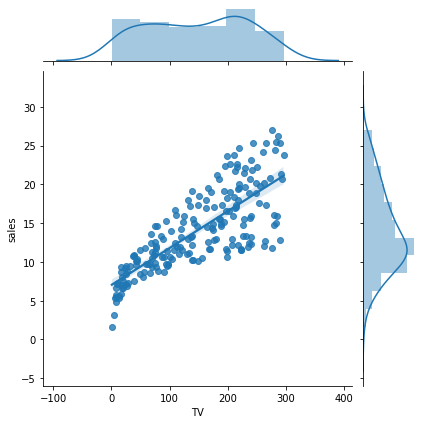

In [7]:
sns.jointplot(x = "TV", y = "sales", data = df, kind = "reg");

In [8]:
X = df[["TV"]]

In [9]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
y = df[["sales"]]

In [11]:
reg = LinearRegression()

In [12]:
model = reg.fit(X,y)

In [13]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
dir(model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [15]:
# b0 constant
model.intercept_

array([7.03259355])

In [16]:
# b1 coefficient
model.coef_

array([[0.04753664]])

In [17]:
# r² value : rate of dependent variables explained by independent variables
model.score(X,y)

0.611875050850071

# Make Prediction

In [18]:
import matplotlib.pyplot as plt

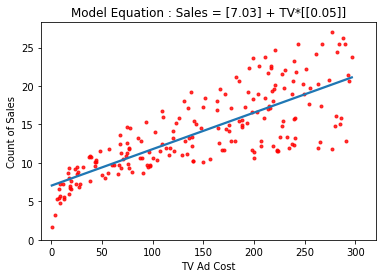

In [19]:
g = sns.regplot(df["TV"], df["sales"], ci=True, scatter_kws={'color': 'r', 's':9})
g.set_title("Model Equation : Sales = {} + TV*{}".format(np.round(model.intercept_, 2), np.round(model.coef_, 2)));
g.set_ylabel("Count of Sales");
g.set_xlabel("TV Ad Cost");
plt.xlim(-10,320);
plt.ylim(bottom=0);

#### Sales = 7.03+(TV*0.05)

In [20]:
model.predict([[20]])

array([[7.98332636]])

In [21]:
# Estimates can be made even for values not in the data set.
costs = [[13], [25], [33], [250], [442], [618]]

In [22]:
model.predict(costs)

array([[ 7.65056987],
       [ 8.22100956],
       [ 8.60130268],
       [18.91675366],
       [28.04378862],
       [36.41023734]])

## Residuals

##### MSE  : Mean Square Error<br/>RMSE : Root Mean Square Error

In [23]:
# real values
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [24]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [25]:
yReal = y[0:10]

In [26]:
yPredict = pd.DataFrame(model.predict(X)[0:10])

In [27]:
errors = pd.concat([yReal, yPredict], axis=1)

In [28]:
errors.columns = ["Real", "Predicted"]
errors

,Real,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [29]:
errors["Error"] = errors["Real"] - errors["Predicted"]

In [30]:
errors

,Real,Predicted,Error
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [31]:
errors["Square Error"] = errors["Error"]**2

In [32]:
errors

,Real,Predicted,Error,Square Error
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [33]:
MSE = np.mean(errors["Square Error"])

In [34]:
MSE

9.290350329638105

In [35]:
RMSE = np.sqrt(MSE)

In [36]:
RMSE

3.048007599996776